## Assignment 2 

Github Link: https://github.com/ruku94/pythonChallenge

In [2]:
import numpy as np
import pandas as pd



In [3]:
allShare= pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")
allShare
allShare["date_str"]=allShare['Date'].str.split("-")
allShare[['year','month','day']] = pd.DataFrame(allShare.date_str.values.tolist(), index= allShare.index)
allShare.head(5)
allShare.drop("date_str",axis=1,inplace=True)
allShare['month']=[ int(x) for x in allShare['month']]
allShare.head()

,Date,Open,High,Low,Close,Volume,Name,year,month,day
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1,03
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1,04
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1,05
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1,06
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1,09


In [4]:
# how is the price of the large cap companies distributed


In [5]:
appl=pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
appl.head(5)
appl["date_str"]=appl['Date'].str.split("-")
appl.head(5)
dt=appl['Date'].str.split("-")
appl[['year','month','day']] = pd.DataFrame(appl.date_str.values.tolist(), index= appl.index)
appl.head(5)
appl.drop("date_str",axis=1,inplace=True)
appl['month']=[ int(x) for x in appl['month']]

### Viz 1
Candle Stick charts to see whether the day saw increase or decrease in price. Continuous increase or decreases in prices lead to change in price in the same direction

In [6]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 10 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
year      3019 non-null object
month     3019 non-null int64
day       3019 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 235.9+ KB


In [7]:
appl_group=appl.groupby(['year','month'],as_index=False).mean()


In [8]:
import plotly as py
py.tools.set_credentials_file(username='ruku94',api_key='Vp0NfkzPBwUqMRKsvSLK')
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf


In [9]:
#Seeing the trend only for past 3 years
appl_ryear=appl_group[appl_group['year'].isin(['2015','2016','2017'])]
trace = go.Candlestick(x=appl_group.index,
                       open=appl_group.Open,
                       high=appl_group.High,
                       low=appl_group.Low,
                       close=appl_group.Close)
data=[trace]
layout = go.Layout(
    title='Candle Stick Chart across 2015, 16 and 17 at Day Level',
    xaxis=dict(
        title='Index (Day Level)',
        gridcolor='rgb(255, 255, 255)'
    ),
    yaxis=dict(
        title='Stock Price',
        gridcolor='rgb(255, 255, 255)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



### Viz 2

To see whether any particular month always saw increase in stock price across several years 
Also, the heat map of apple stock price is compared to all the stock prices across all years to see the stock moved relatively similar to other stocks or any deviations were there
Note: The values in heat map represent the close price

In [10]:
import seaborn as sns
%matplotlib inline

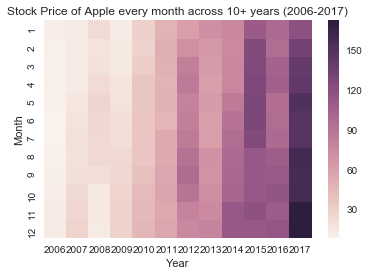

In [40]:

pvappl = appl_group.pivot_table(values='Close',index='month',columns='year',aggfunc=np.mean)
ax=sns.heatmap(pvappl)
ax.set(xlabel='Year', ylabel='Month')
ax.set_title("Stock Price of Apple every month across 10+ years (2006-2017)")





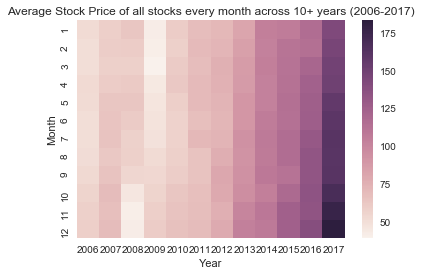

In [42]:
# compare this chart with overall are all prices going up?
overall=allShare.pivot_table(values='Close',index='month',columns='year',aggfunc=np.mean)
ax1=sns.heatmap(overall)
ax1.set(xlabel='Year', ylabel='Month')
ax1.set_title("Average Stock Price of all stocks every month across 10+ years (2006-2017)")


### Viz 3
How Volume and Price change over one year. Are there any interesting spikes followed by very high changes in volume traded in price. Comparing the volume with prvious year's average volume if a particular day trades at a volume higher than the average then what is the effect the next day, taking 2016 data for appl stock

In [24]:
# subset for 2016 data, flag whther the volume is greater than 2015 average volume then see how the next day close price
#This is to check how the people react to high changes in volume traded

appl_2016=appl[appl['year']=='2016']
vol_2015=appl[appl['year']=='2015'].groupby(['year','month'],as_index=False).mean()
vol_2015=vol_2015[['month','Volume']]
appl_2016=pd.merge(appl_2016,vol_2015,how='inner',on='month')



In [25]:
def f(appl_2016):
    if appl_2016["Volume_x"]>appl_2016["Volume_y"]:
        flag_hvol=1
    else:
        flag_hvol=0
    return flag_hvol

In [26]:
appl_2016["flag_hvol"]=appl_2016.apply(f,axis=1)
masklow= appl_2016["flag_hvol"]==0
maskhigh=appl_2016["flag_hvol"]!=0
appl_2016.head()
from datetime import datetime
appl_2016["Date"]=[datetime.strptime(x, '%Y-%m-%d') for x in appl_2016["Date"]]


In [27]:
import matplotlib.pyplot as plt
mask1=appl_2016[appl_2016["flag_hvol"]==0]
mask2=appl_2016[appl_2016["flag_hvol"]==1]
#plt.bar(mask1["Date"],mask1["Close"],"r")
#plt.bar(mask2["Date"],mask2["Close"],"g")


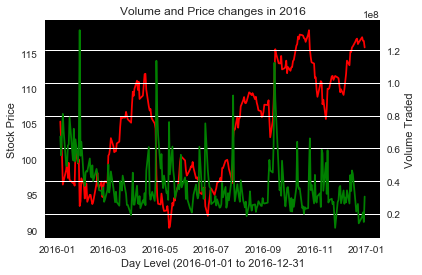

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(appl_2016["Date"],appl_2016["Close"],"r")
ax2.plot(appl_2016["Date"],appl_2016["Volume_x"],"g")
ax1.patch.set_facecolor('black')
ax1.grid(False)
ax1.set_xlabel("Day Level (2016-01-01 to 2016-12-31")
ax1.set_ylabel("Stock Price")
ax2.set_ylabel("Volume Traded")
ax1.set_title("Volume and Price changes in 2016")

The volume traded decreased compared to 2016 january, Not a lot of spikes in volume during the recent months but  overall price increased over one year

### Viz 4
To see if there is any relationship/correlation with change in close price and previous day volume.
Finding:
Most of the data points show a negative correlation between change in close price and the volume traded previous day
There is no particular pattern seen in change in close price when  volume traded exceeds  average volume the previous day


In [58]:
data.head()

,Volume_x,flag_hvol,close_today,Close,chg_close
0,67281190,1,102.71,105.35,-0.025059
1,55790992,0,100.70,102.71,-0.019570
2,68457388,1,96.45,100.70,-0.042205
3,81094428,1,96.96,96.45,0.005288
4,70798016,1,98.53,96.96,0.016192


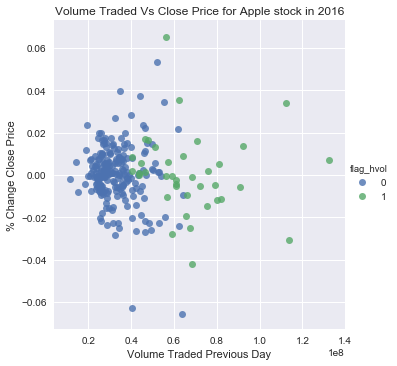

In [60]:
#Relationship with change in close price and previous day volume
#align price and previous day volume
volume=appl_2016[["Volume_x","flag_hvol"]]
volume=volume[:-1]
close=appl_2016["Close"]
close_prev=close[:-1]
close_today=close[1:]
close_today=close_today.reset_index()
close_today=close_today.rename(columns={"Close":"close_today"})
close_today=close_today["close_today"]
data=pd.concat([volume,close_today,close_prev],axis=1)
data["chg_close"]=(data["close_today"]-data["Close"])/data["Close"]
ax1=sns.lmplot("Volume_x","chg_close",data=data,hue="flag_hvol",fit_reg=False)
ax1.set(xlabel='Volume Traded Previous Day', ylabel='% Change Close Price', title="Volume Traded Vs Close Price for Apple stock in 2016")

### Viz 5

Comparing all the major stocks in the information technology sector in 2016 across all months. To see whether they all on average follow the same trend


In [33]:
itSector=allShare[allShare["Name"].isin(["IBM","AAPL","GOOGL","AMZN","CSCO","MSFT"])]
itSector=itSector[itSector["year"]=="2016"]
pv=itSector.pivot_table(values='Close',index='month',columns='Name',aggfunc=np.mean)
pv.head()


Name,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT
month,,,,,,
1,98.428947,601.061579,24.348947,736.656842,128.406316,52.403684
2,95.746500,530.620000,24.863000,724.390000,127.487000,51.380500
3,104.267273,572.374091,27.699545,746.787273,143.671818,53.384091
4,106.739048,613.594286,28.069524,756.608571,149.381429,54.054286
5,94.974762,697.473810,27.377619,726.529524,148.238095,50.969524


 cited from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001AE8CBDF898>>

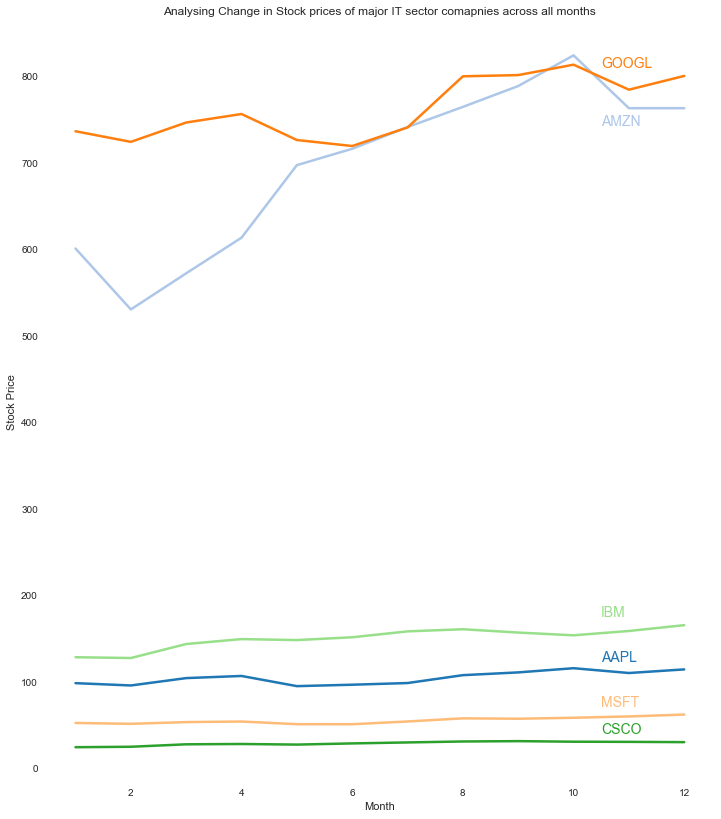

In [79]:

import matplotlib.pyplot as plt  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
Stocks=['AAPL','AMZN','GOOGL','MSFT','CSCO','IBM']
for rank,column in enumerate(Stocks):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(pv.index,pv[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])  
    y_pos = pv[column.replace("\n", " ")].values[-1] - 0.5 + 10
    if column=="AMZN":
        y_pos+=-30
    
    plt.text(10.5,y_pos,column, fontsize=14, color=tableau20[rank])
ax.set_xlabel("Month")
ax.set_ylabel("Stock Price")
ax.set_title("Analysing Change in Stock prices of major IT sector comapnies across all months")
ax.patch.set_facecolor('white')


### Viz 6

How the close price is distributed during 2016 for various Information Technology sector stocks. This shows which showed a high variation in the close price


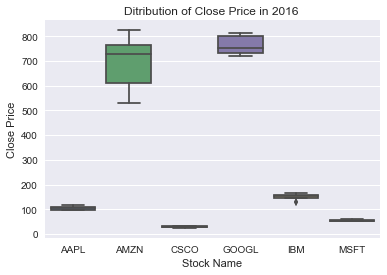

In [81]:
#BOX plot
ax1=sns.boxplot(data=pv)
ax1.set(xlabel='Stock Name', ylabel='Close Price', title="Ditribution of Close Price in 2016 ")

This graph shows thatamong the comapnies in it sector, Google and Amazon have higher variations in price compared to the rest of teh stocks in the year 2016

### Viz 7

Difference in distribution of number of stocks traded between 2017 and 2016

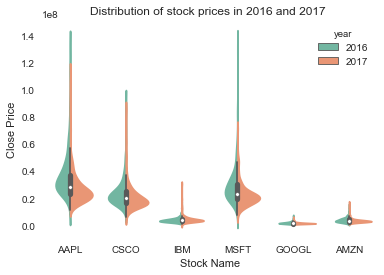

In [80]:

fig4,ax4=plt.subplots()
itSector=allShare[allShare["Name"].isin(["IBM","AAPL","GOOGL","AMZN","CSCO","MSFT"])]
itSector=itSector[itSector["year"].isin(["2016","2017"])]
ax4=sns.violinplot(x="Name", y="Volume",data=itSector,hue="year",split=True,palette="Set2")
ax4.patch.set_facecolor('white')
ax4.set(xlabel='Stock Name', ylabel='Volume', title="Distribution of stock prices in 2016 and 2017 ")

In [37]:
allShare["Name"].unique()

#AABA, TRV, JPM, UNH
# KO, AMZ, WMT, PG
#PFE , TRV, UNH


array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

### Viz 8 

Relationship betwwen stocks in different sectors, whether price change in one sector cause a decrase or incrase in another sector after some time
In this way price mvements can be predicted by using price movements of stocks in another sector
Here Pharmaceutical(PFE) Industry stock is compared with Insurance sector(TRV and UNH) stocks
TRV and UNH follow a very similar trend

In [38]:
hSector=allShare[allShare["Name"].isin(["PFE","TRV","UNH"])]
hSector=hSector[hSector["year"]=="2016"]
pvh=hSector.pivot_table(values='Close',index='month',columns='Name',aggfunc=np.mean)
pvh.head()
pvh=pd.DataFrame(pvh)

pvh=pvh.reset_index()
pvh.head()

Name,month,PFE,TRV,UNH
0,1,30.922105,105.801053,112.810000
1,2,29.632500,107.334500,115.881500
2,3,29.833182,113.703182,125.225455
3,4,32.474762,113.850000,129.863333
4,5,33.655714,111.846190,131.682857


In [106]:
import plotly.plotly as py
import plotly.graph_objs as go
  
trace0 = go.Scatter(
    x = pvh["month"],
    y = pvh["PFE"].values,
    mode = 'lines+markers',
    name = "PFE")
trace1 = go.Scatter(
    x = pvh["month"],
    y = pvh["TRV"].values,
    mode = 'lines',
    name = "TRV")
trace2 = go.Scatter(
    x = pvh["month"],
    y = pvh["UNH"].values,
    mode = 'lines',
    name = "UNH")
data=[trace0,trace1,trace2]
layout = go.Layout(
    title='Relationship between stocks in different related sectors ',
    xaxis=dict(
        title='Month',
        gridcolor='rgb(255, 255, 255)'
    ),
    yaxis=dict(
        title='Close Price',
        gridcolor='rgb(255, 255, 255)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Viz 9 

FMCG (Fast moving consumer goods) sector major stocks are comapred. Walmart and PG follow almost similar trend. However, PG vary alot interm of number of stock traded especially during september and october

In [13]:
# KO, AMZ, WMT, PG CPG sector
cSector=allShare[allShare["Name"].isin(["KO","WMT","PG"])]
cSector=cSector[cSector["year"]=="2016"][["Name","month","Close","Volume"]]
cSector=cSector.groupby(["Name","month"], as_index=False).max()




In [107]:
sizeref = 2.*max(cSector['Volume'])/(100**2)
trace0 = go.Scatter(
        x=cSector['month'][cSector['Name'] == 'KO'],
        y=cSector['Close'][cSector['Name'] == 'KO'],
        mode='markers',
        name='KO',
        text=cSector["Volume"][cSector['Name'] == 'KO'],
        marker=dict(
          symbol='circle',
          sizemode='area',
          sizeref=sizeref,
          size=cSector['Volume'][cSector['Name'] == 'KO'],
          line=dict(
            width=2
          ),
        )
    )
trace1 = go.Scatter(
      x=cSector['month'][cSector['Name'] == 'WMT'],
      y=cSector['Close'][cSector['Name'] == 'WMT'],
      mode='markers',
      name='WMT',
      text=cSector["Volume"][cSector['Name'] == 'WMT'],
      marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=cSector['Volume'][cSector['Name'] == 'WMT'],
        line=dict(
          width=2
        ),
      )
    )
trace2 = go.Scatter(
      x=cSector['month'][cSector['Name'] == 'PG'],
      y=cSector['Close'][cSector['Name'] == 'PG'],
      mode='markers',
      name='PG',
      text=cSector["Volume"][cSector['Name'] == 'PG'],
      marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=cSector['Volume'][cSector['Name'] == 'PG'],
        line=dict(
          width=2
        ),
      )
    )
data=[trace0,trace1,trace2]
layout = go.Layout(
    title='FMCG Sector Stocks (Bubble size is proportional to volume traded)',
    xaxis=dict(
        title='Month',
        gridcolor='rgb(255, 255, 255)'
    ),
    yaxis=dict(
        title='Close Price',
        gridcolor='rgb(255, 255, 255)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



### Viz 10

TRV and UNH show verry similar trend. Therefore lets draw a regression plot between the close price of the two stocks.
A high correlation 

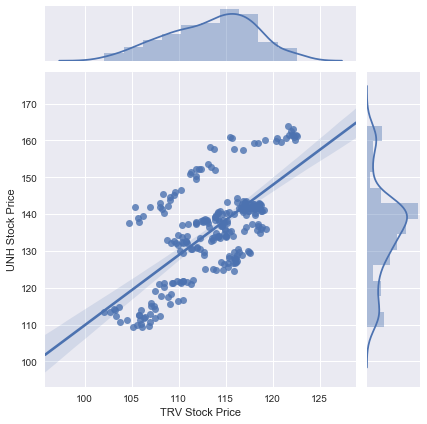

In [103]:

RSector=allShare[allShare["Name"].isin(["TRV","UNH"])]
RSector=hSector[hSector["year"].isin(["2016","2017"])][["Date","Close","Name"]]
Rpv=RSector.pivot_table(values='Close',index='Date',columns='Name',aggfunc=np.mean)
Rpv=Rpv.reset_index()
Rpv=Rpv.rename(columns={"TRV":"TRV Stock Price","UNH":"UNH Stock Price"})
g = sns.JointGrid(x="TRV Stock Price",y="UNH Stock Price",data=Rpv )
g = g.plot(sns.regplot, sns.distplot)

